# breif

here we make 100 stimulated catalogs for each dataset using guassian distribution, with mean as observed value and error in measurement as standard diviation for each band,redshift and mass. But for mass standard diviation is used as half of difference between 16th and 84th percentile value listed in catalog.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from astropy.io import fits

In [16]:
file1=fits.open('galSpecExtra-dr8.fits')

In [17]:
data=file1[1].data
data1={'plate':data['PLATEID'],'mjd':data['MJD'],'fiberid':data['FIBERID'],'OH_P50':data['OH_P50'],'LGM_TOT_P50':data['LGM_TOT_P50'],'LGM_TOT_P16':data['LGM_TOT_P16'],'LGM_TOT_P84':data['LGM_TOT_P84']}
f=pd.DataFrame(data1)
df=f.copy()
df = df.replace(-9999,pd.np.nan)
df=df.replace(0,pd.np.nan)



/tmp/ipykernel_26723/1848980568.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df = df.replace(-9999,pd.np.nan)
/tmp/ipykernel_26723/1848980568.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df=df.replace(0,pd.np.nan)


In [18]:
df.to_csv('raw_metallicity_stellarmass.csv',index=False)
f1=pd.read_csv("raw_metallicity_stellarmass.csv")

In [19]:
f1=f1.dropna()

In [20]:
f1['err_mass']=(f1['LGM_TOT_P84']-f1['LGM_TOT_P16'])/2
f1.drop(['LGM_TOT_P84','LGM_TOT_P16','LGM_TOT_P50','OH_P50'],axis=1,inplace=True)

stimulated set 1

In [56]:
f2=pd.read_csv("errtest1.csv")
final_err_1=pd.merge(f1,f2,how="inner",on=["plate","mjd","fiberid"])
final_err_1.drop(final_err_1[final_err_1['err_z_p']==-9999].index,inplace=True)
final_err_1

,plate,mjd,fiberid,err_mass,err_u,err_g,err_r,err_i,err_z,err_z_p
0,266,51630,189,0.105206,0.073024,0.011102,0.007450,0.006925,0.017384,0.022969
1,266,51630,229,0.094424,0.059005,0.012581,0.008296,0.008663,0.025167,0.021380
2,266,51630,247,0.135959,0.064654,0.010712,0.007548,0.006914,0.015984,0.027352
4,266,51630,289,0.092515,0.052749,0.009343,0.007808,0.008055,0.021788,0.021798
5,266,51630,323,0.078263,0.056037,0.011029,0.009181,0.010561,0.029714,0.025824
...,...,...,...,...,...,...,...,...,...,...
28678,2974,54592,506,0.445301,0.037850,0.007513,0.006641,0.006677,0.019067,0.022078
28679,2974,54592,534,0.471781,0.045569,0.007868,0.006478,0.006572,0.018552,0.021059
28680,2974,54592,560,0.436128,0.052764,0.007885,0.007072,0.007457,0.024722,0.024153
28681,2974,54592,564,0.430809,0.035624,0.006605,0.005944,0.006031,0.017571,0.022688


In [57]:
file1=pd.read_csv("use_this_data.csv")
file1.drop(["h_beta","h_alpha","OIII","NII","OII"],axis=1,inplace=True) # dropping spectroscopic params.
data_set1=file1[((file1['z_s']>0.09) & (file1['z_s']<0.12)) & (file1['r']<18)]
data_set1.drop("z_s",axis=1,inplace=True)

/tmp/ipykernel_26723/4204477866.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set1.drop("z_s",axis=1,inplace=True)


In [58]:
data_set1=data_set1[["plate","mjd","fiberid",'u','g','r','i','z','z_p','metallicity','mass']]
set1=pd.merge(data_set1,final_err_1,how="inner",on=["plate","mjd","fiberid"])
test_1= set1.sample(frac = 0.0042)

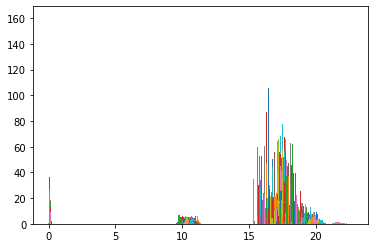

In [120]:
guass_x=[]
for i,j in zip(['u','g','r','i','z','z_p','mass'],['err_u','err_g','err_r','err_i','err_z','err_z_p','err_mass']):
   temp=[]
   for k in range(100): 
       mu, sigma = test_1[i].iloc[k],test_1[j].iloc[k] # mean and standard deviation
       s = np.random.normal(mu, sigma,1000)
       count, bins, ignored = plt.hist(s, 100, density=True)
       temp.append(bins[np.argmax(count)])
   guass_x.append(temp)    

In [124]:
new_test_1=pd.DataFrame(data={"u":guass_x[0],"g":guass_x[1],"r":guass_x[2],"i":guass_x[3],"z":guass_x[4],"z_p":guass_x[5],"mass":guass_x[6],'metallicity':test_1['metallicity']})

In [126]:
new_test_1["u-g"]=new_test_1["u"]-new_test_1["g"] 
new_test_1["u-r"]=new_test_1["u"]-new_test_1["r"] 
new_test_1["u-i"]=new_test_1["u"]-new_test_1["i"] 
new_test_1["u-z"]=new_test_1["u"]-new_test_1["z"] 
new_test_1["g-r"]=new_test_1["g"]-new_test_1["r"] 
new_test_1["g-i"]=new_test_1["g"]-new_test_1["i"] 
new_test_1["g-z"]=new_test_1["g"]-new_test_1["z"] 
new_test_1["r-i"]=new_test_1["r"]-new_test_1["i"] 
new_test_1["r-z"]=new_test_1["r"]-new_test_1["z"] 
new_test_1["i-z"]=new_test_1["i"]-new_test_1["z"] 
new_test_1["(u-g)^2"]=(new_test_1["u"]-new_test_1["g"])**2
new_test_1["(u-r)^2"]=(new_test_1["u"]-new_test_1["r"])**2 
new_test_1["(u-i)^2"]=(new_test_1["u"]-new_test_1["i"])**2
new_test_1["(u-z)^2"]=(new_test_1["u"]-new_test_1["z"])**2 
new_test_1["(g-r)^2"]=(new_test_1["g"]-new_test_1["r"])**2 
new_test_1["(g-i)^2"]=(new_test_1["g"]-new_test_1["i"])**2 
new_test_1["(g-z)^2"]=(new_test_1["g"]-new_test_1["z"])**2 
new_test_1["(r-i)^2"]=(new_test_1["r"]-new_test_1["i"])**2 
new_test_1["(r-z)^2"]=(new_test_1["r"]-new_test_1["z"])**2 
new_test_1["(i-z)^2"]=(new_test_1["i"]-new_test_1["z"])**2 

In [128]:
new_test_1.to_csv("stimulated_catalog_1.csv",index=False)

stimulates test set 2

In [ ]:
f2=pd.read_csv("errtest2.csv")
final_err_2=pd.merge(f1,f2,how="inner",on=["plate","mjd","fiberid"])
final_err_2.drop(final_err_2[final_err_2['err_z_p']==-9999].index,inplace=True)
final_err_2

In [137]:
file1=pd.read_csv("use_this_data.csv")
file1.drop(["h_beta","h_alpha","OIII","NII","OII"],axis=1,inplace=True) # dropping spectroscopic params.
data_set1=file1[((file1['z_s']>0.2) & (file1['z_s']<0.25)) & ((file1['r']<25)&(file1['r']>15))]
data_set1.drop("z_s",axis=1,inplace=True)

/tmp/ipykernel_26723/2086021231.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set1.drop("z_s",axis=1,inplace=True)


In [150]:
data_set1=data_set1[["plate","mjd","fiberid",'u','g','r','i','z','z_p','metallicity','mass']]
set1=pd.merge(data_set1,final_err_2,how="inner",on=["plate","mjd","fiberid"])
test_1= set1.sample(frac = 0.0205)

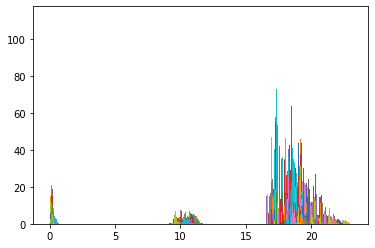

In [152]:
guass_x=[]
for i,j in zip(['u','g','r','i','z','z_p','mass'],['err_u','err_g','err_r','err_i','err_z','err_z_p','err_mass']):
   temp=[]
   for k in range(100): 
       mu, sigma = test_1[i].iloc[k],test_1[j].iloc[k] # mean and standard deviation
       s = np.random.normal(mu, sigma,1000)
       count, bins, ignored = plt.hist(s, 100, density=True)
       temp.append(bins[np.argmax(count)])
   guass_x.append(temp)    

In [153]:
new_test_2=pd.DataFrame(data={"u":guass_x[0],"g":guass_x[1],"r":guass_x[2],"i":guass_x[3],"z":guass_x[4],"z_p":guass_x[5],"mass":guass_x[6],'metallicity':test_1['metallicity']})

In [154]:
new_test_2["u-g"]=new_test_2["u"]-new_test_2["g"] 
new_test_2["u-r"]=new_test_2["u"]-new_test_2["r"] 
new_test_2["u-i"]=new_test_2["u"]-new_test_2["i"] 
new_test_2["u-z"]=new_test_2["u"]-new_test_2["z"] 
new_test_2["g-r"]=new_test_2["g"]-new_test_2["r"] 
new_test_2["g-i"]=new_test_2["g"]-new_test_2["i"] 
new_test_2["g-z"]=new_test_2["g"]-new_test_2["z"] 
new_test_2["r-i"]=new_test_2["r"]-new_test_2["i"] 
new_test_2["r-z"]=new_test_2["r"]-new_test_2["z"] 
new_test_2["i-z"]=new_test_2["i"]-new_test_2["z"] 
new_test_2["(u-g)^2"]=(new_test_2["u"]-new_test_2["g"])**2
new_test_2["(u-r)^2"]=(new_test_2["u"]-new_test_2["r"])**2 
new_test_2["(u-i)^2"]=(new_test_2["u"]-new_test_2["i"])**2
new_test_2["(u-z)^2"]=(new_test_2["u"]-new_test_2["z"])**2 
new_test_2["(g-r)^2"]=(new_test_2["g"]-new_test_2["r"])**2 
new_test_2["(g-i)^2"]=(new_test_2["g"]-new_test_2["i"])**2 
new_test_2["(g-z)^2"]=(new_test_2["g"]-new_test_2["z"])**2 
new_test_2["(r-i)^2"]=(new_test_2["r"]-new_test_2["i"])**2 
new_test_2["(r-z)^2"]=(new_test_2["r"]-new_test_2["z"])**2 
new_test_2["(i-z)^2"]=(new_test_2["i"]-new_test_2["z"])**2 

In [155]:
new_test_2.to_csv("stimulated_catalog_2.csv",index=False)